In [1]:
#import library yang dibutuhkan

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [2]:
data = pd.read_csv('dataset_baru.csv')
data.head()

,Unnamed: 0,gender,umur,tensi,riwayat jantung,tempat tinggal,gula darah,berat badan,stroke,tipe kerja_Govt_job,tipe kerja_Never_worked,tipe kerja_Private,tipe kerja_Self-employed,tipe kerja_children
0,0,1,67.0,0,1,1,228.69,36.600000,1,0,0,1,0,0
1,1,0,61.0,0,0,0,202.21,28.891511,1,0,0,0,1,0
2,2,1,80.0,0,1,0,105.92,32.500000,1,0,0,1,0,0
3,3,0,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0
4,4,0,79.0,1,0,0,174.12,24.000000,1,0,0,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5109 non-null   int64  
 1   gender                    5109 non-null   int64  
 2   umur                      5109 non-null   float64
 3   tensi                     5109 non-null   int64  
 4   riwayat jantung           5109 non-null   int64  
 5   tempat tinggal            5109 non-null   int64  
 6   gula darah                5109 non-null   float64
 7   berat badan               5109 non-null   float64
 8   stroke                    5109 non-null   int64  
 9   tipe kerja_Govt_job       5109 non-null   int64  
 10  tipe kerja_Never_worked   5109 non-null   int64  
 11  tipe kerja_Private        5109 non-null   int64  
 12  tipe kerja_Self-employed  5109 non-null   int64  
 13  tipe kerja_children       5109 non-null   int64  
dtypes: float

In [4]:
x = data.drop(['Unnamed: 0', 'stroke'], axis=1)
y = data['stroke']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [75]:
x.head()

,gender,umur,tensi,riwayat jantung,tempat tinggal,gula darah,berat badan,tipe kerja_Govt_job,tipe kerja_Never_worked,tipe kerja_Private,tipe kerja_Self-employed,tipe kerja_children
0,1,67.0,0,1,1,228.69,36.600000,0,0,1,0,0
1,0,61.0,0,0,0,202.21,28.891511,0,0,0,1,0
2,1,80.0,0,1,0,105.92,32.500000,0,0,1,0,0
3,0,49.0,0,0,1,171.23,34.400000,0,0,1,0,0
4,0,79.0,1,0,0,174.12,24.000000,0,0,0,1,0


# Algoritma Supervised Learning

### 1. K-Nearest Neighbors (KNN)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [77]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [78]:
knn.score(x_test, y_test)

0.9360730593607306

In [79]:
y_pred = knn.predict(x_test)

In [80]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.15      0.02      0.04        89

    accuracy                           0.94      1533
   macro avg       0.55      0.51      0.50      1533
weighted avg       0.90      0.94      0.91      1533



In [82]:
y_test.shape

(1533,)

In [83]:
confusion_matrix(y_test, y_pred)

array([[1433,   11],
       [  87,    2]], dtype=int64)

C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


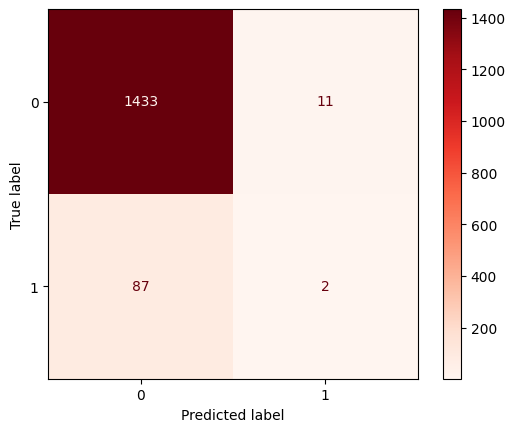

In [84]:
plot_confusion_matrix(knn, x_test, y_test, cmap='Reds')

### 2. Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2)

In [68]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [69]:
dt_pred = dt.predict(x_test)

In [70]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


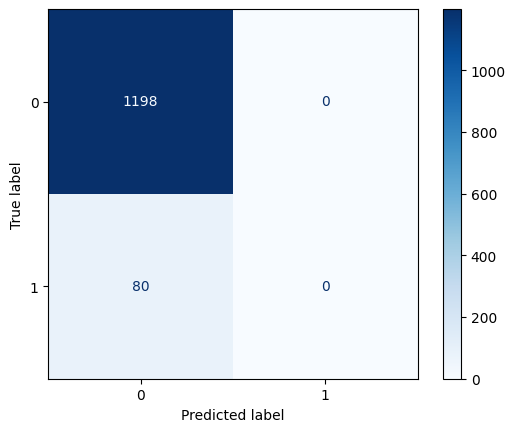

In [71]:
plot_confusion_matrix(dt, x_test, y_test, cmap="Blues")

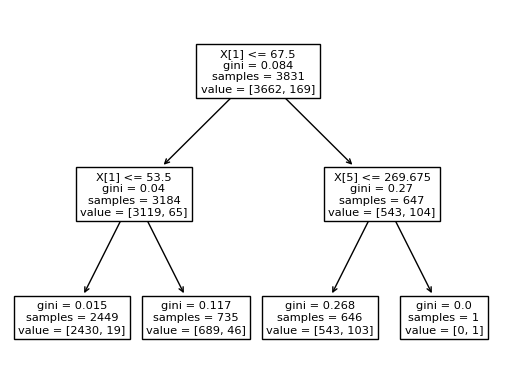

In [72]:
from sklearn import tree

tree.plot_tree(dt)
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,3,4,5,6,7]}
grid = GridSearchCV(dt, params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]}, scoring='accuracy')

In [35]:
print(grid.best_params_)

{'max_depth': 2}


### 3. Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [37]:
gnb.fit(x_train, y_train)

GaussianNB()

In [38]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [39]:
gnb_pred = gnb.predict(x_test)
mnb_pred = mnb.predict(x_test)

In [40]:
print("Gaussian NB : ")
print(classification_report(y_test, gnb_pred))

Gaussian NB : 
              precision    recall  f1-score   support

           0       0.99      0.56      0.71      1444
           1       0.11      0.90      0.20        89

    accuracy                           0.58      1533
   macro avg       0.55      0.73      0.45      1533
weighted avg       0.94      0.58      0.68      1533



In [41]:
print("Multinomial NB : ")
print(classification_report(y_test, mnb_pred))

Multinomial NB : 
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1444
           1       0.13      0.42      0.20        89

    accuracy                           0.81      1533
   macro avg       0.55      0.62      0.55      1533
weighted avg       0.91      0.81      0.85      1533



C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


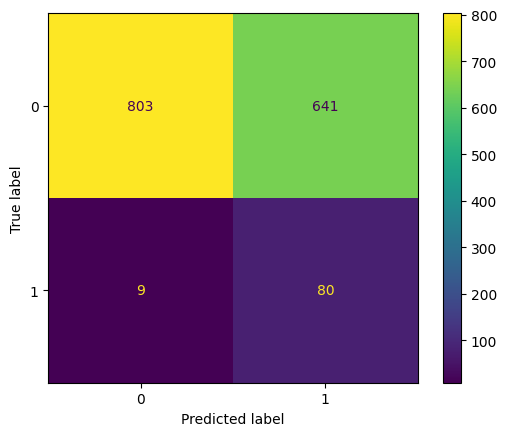

In [42]:
plot_confusion_matrix(gnb, x_test, y_test)

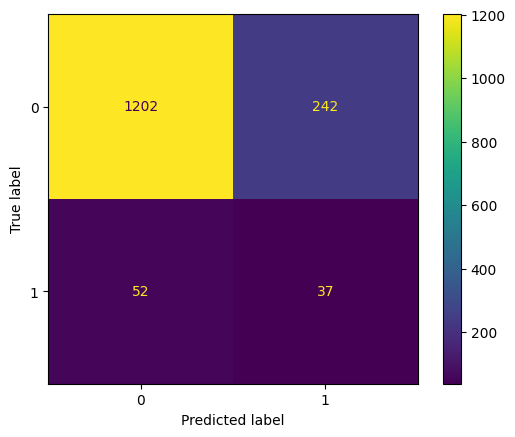

In [125]:
_= plot_confusion_matrix(mnb, x_test, y_test)

### 4. Suport Vector Machine (SVM)

In [119]:
from sklearn.svm import SVC

svm = SVC()

In [120]:
svm.fit(x_train, y_train)

SVC()

In [121]:
svm_pred = svm.predict(x_test)

In [122]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



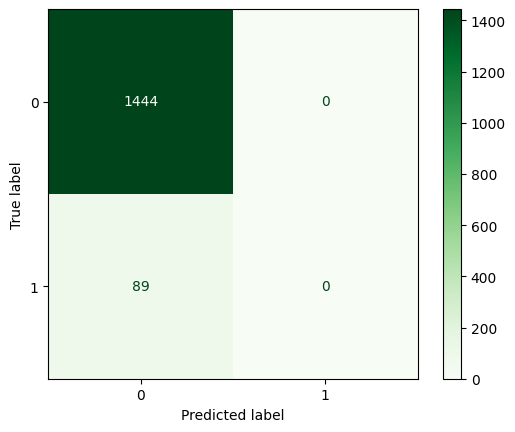

In [124]:
plot_confusion_matrix(svm, x_test, y_test, cmap="Greens")
plt.show()

### 5. Linear Regression

In [92]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [93]:
df.isna().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [97]:
df = df.rename(columns = {'YearsExperience':'pengalaman', 'Age':'umur', 'Salary':'gaji'})
df.head()

,pengalaman,umur,gaji
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [108]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()

#### Simple Linear Regression 

Ketika atributenya cuma 1

In [117]:
lg.fit(df[['pengalaman']], df.gaji)

LinearRegression()

In [118]:
print(lg.predict([[1.1]]))

[36187.15875227]


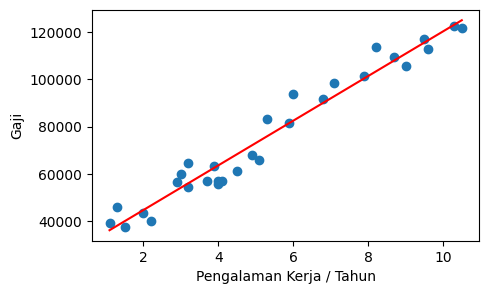

In [112]:
plt.figure(figsize=(5,3))
plt.xlabel('Pengalaman Kerja / Tahun')
plt.ylabel('Gaji')
plt.scatter(df[['pengalaman']], df.gaji)
plt.plot(df[['pengalaman']], lg.predict(df[['pengalaman']]), color='red')
plt.show()

#### Multiple Linear Regression

Ketika atribute lebih dari 1

In [126]:
lg.fit(df[['pengalaman','umur']], df.gaji)

LinearRegression()

In [127]:
print(lg.predict([[1.1, 21.0]]))

[38662.98691225]


In [128]:
lg.coef_

array([6153.35330145, 1836.01359426])

In [129]:
lg.intercept_

-6661.98719881312